In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df =pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.sample(1)

User ID  Gender  Age  EstimatedSalary  Purchased
210  15724536  Female   48            96000          1

In [4]:
df = df.iloc[ : , 2: ]
# droping frist 2 row from dataset 

In [5]:
df.sample(3)

Age  EstimatedSalary  Purchased
313   49           141000          1
121   37            72000          0
237   37            80000          0

Split train test data 

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size = 0.4,random_state=0)
x_train.shape , x_test.shape

((240, 2), (160, 2))

Standardrisation of data set by sklearn.preprocessing ->StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)#it calculate mean and standard deviation scaler.mean_ , scaler.std_
x_train_s =scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [8]:
scaler.mean_

array([3.77208333e+01, 6.79625000e+04])

In [9]:
#sklearn class return numpy arrays  

x_train_scaled = pd.DataFrame(x_train_s, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_s, columns=x_test.columns)

In [10]:
x_train_scaled.sample(2)

Age  EstimatedSalary
109 -0.463247        -0.233088
197 -1.150145        -1.052738

In [11]:
np.round(x_train.describe(),1)

Age  EstimatedSalary
count  240.0            240.0
mean    37.7          67962.5
std     10.2          34232.3
min     18.0          15000.0
25%     30.0          41750.0
50%     37.0          65500.0
75%     46.0          86250.0
max     60.0         150000.0

In [12]:
np.round(x_train_scaled.describe(),1)#np.round roundoff the data frist palce after decimal 

Age  EstimatedSalary
count  240.0            240.0
mean     0.0              0.0
std      1.0              1.0
min     -1.9             -1.6
25%     -0.8             -0.8
50%     -0.1             -0.1
75%      0.8              0.5
max      2.2              2.4

In [13]:
x_train_scaled.describe()

Age  EstimatedSalary
count  2.400000e+02     2.400000e+02
mean   1.776357e-16     9.251859e-18
std    1.002090e+00     1.002090e+00
min   -1.935171e+00    -1.550382e+00
25%   -7.576321e-01    -7.673239e-01
50%   -7.073413e-02    -7.208527e-02
75%    8.124204e-01     5.353337e-01
max    2.186216e+00     2.401500e+00

Effect of scaling

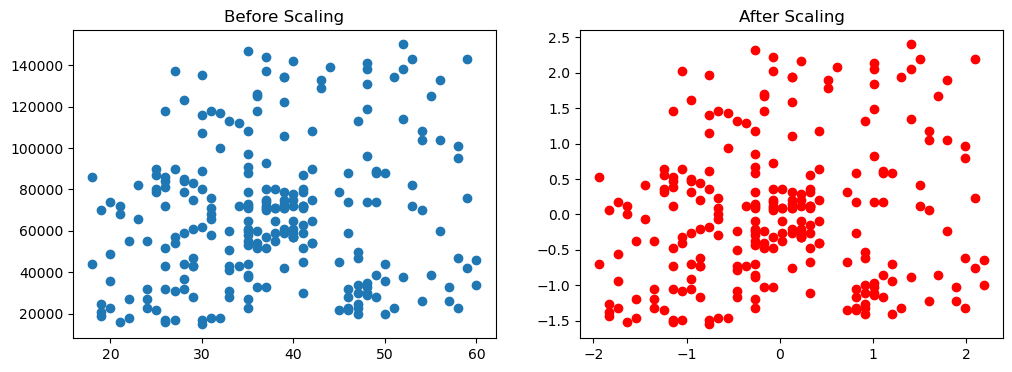

In [14]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

plt.show()

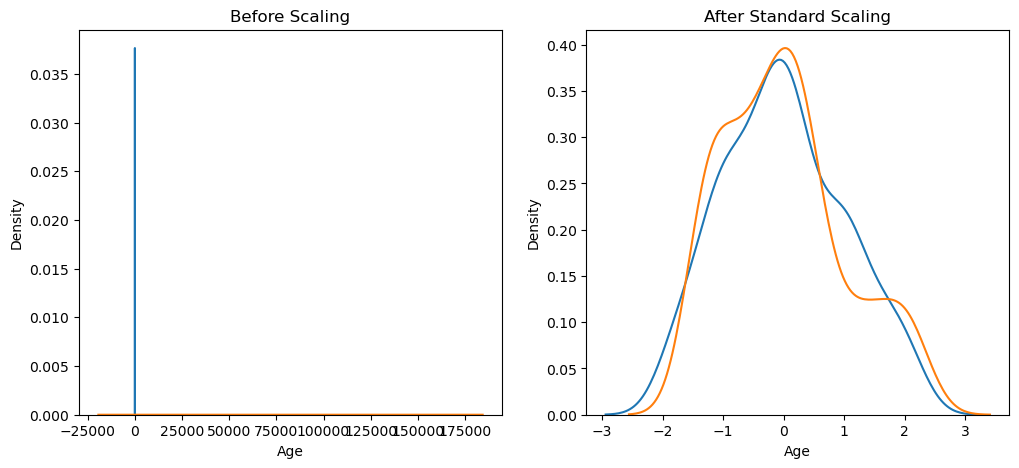

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

camparition of distribution 

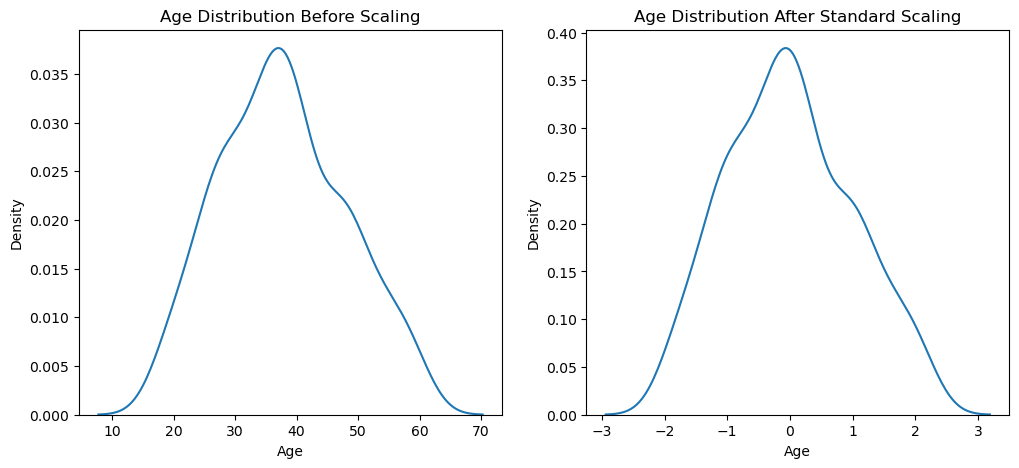

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

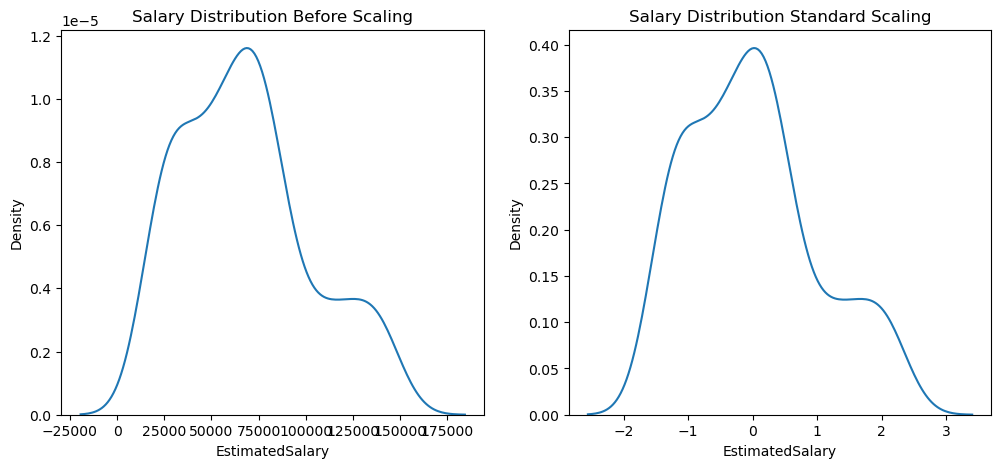

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

Why scaling is important 

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()


In [19]:
#training our models 
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)


LogisticRegression()

In [20]:
#pridected optput on test data
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [21]:
#check accuarcy
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8625
Scaled 0.85625


In [22]:

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8875


Effect of out liiers 

In [32]:
#df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

In [25]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})], ignore_index=True)


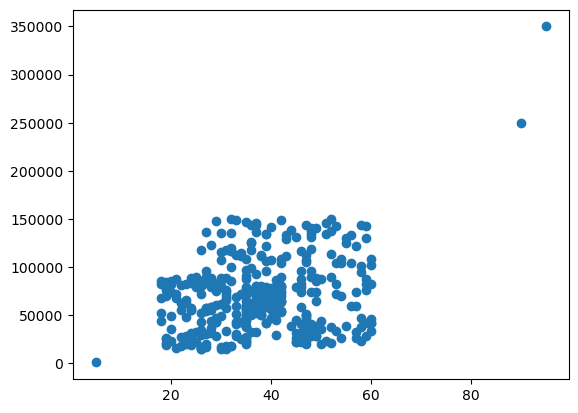

In [26]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

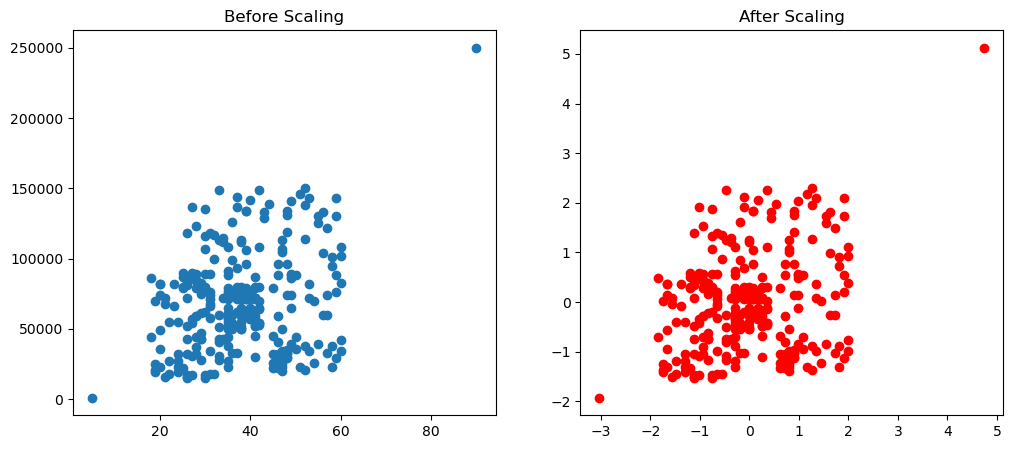

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [31]:
# no effect on out liers 